In [105]:
from keras.models import load_model
import os
import pickle

# import pandas as pd

from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt


In [20]:
MODELS_DIR = 'models'

In [21]:
model_filenames = [x for x in os.listdir(MODELS_DIR) if x.endswith('.model')]


In [22]:
def load_checkpointed_keras_model(model_filename):
    model_filepath = os.path.join(MODELS_DIR, model_filename)
    model = load_model(model_filepath)
    return model

In [26]:
base_run_names = [model_name.split('.')[0] for model_name in model_filenames]

In [98]:
LABEL_DICT = {
    0: "color_green",
    1: "color_purple",
    2: "color_red",
    3: "fill_empty",
    4: "fill_lines",
    5: "fill_solid",
    6: "number_1",
    7: "number_2",
    8: "number_3",
    9: "shape_diamond",
    10: "shape_oval",
    11: "shape_squiggle"
    }


In [101]:
def get_fpr_tpr_roc_auc(test_y, predictions):
    fpr_dict = {}
    tpr_dict = {}
    roc_auc_dict = {}
    for label_ind in LABEL_DICT.keys():
        fpr_dict[label_ind], tpr_dict[label_ind], _ = roc_curve(y_true=test_y[:, label_ind], y_score=predictions[:, label_ind])
        roc_auc_dict[label_ind] = auc(fpr_dict[label_ind], tpr_dict[label_ind])
    return fpr_dict, tpr_dict, roc_auc_dict

In [130]:
def plot_auc_roc(fpr_dict, tpr_dict, roc_auc_dict, base_run_name):
    fig, axes = plt.subplots(4, 1, figsize=(8,12))
    for label_ind in fpr_dict.keys():
        # group the plot by data type
        this_ax = axes[label_ind // 3]
        g = this_ax.plot(fpr_dict[label_ind], tpr_dict[label_ind], label="{} {}".format(LABEL_DICT[label_ind], round(roc_auc_dict[label_ind], 3)))
        this_ax.legend(title="AUCs")
        this_ax.set_xlabel('false positive rate')
        this_ax.set_ylabel('true positive rate')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)

    fig.suptitle(base_run_name)



20190116-1505_model_run_seed_42
20190116-1511_model_run_seed_45
20190116-1507_model_run_seed_43


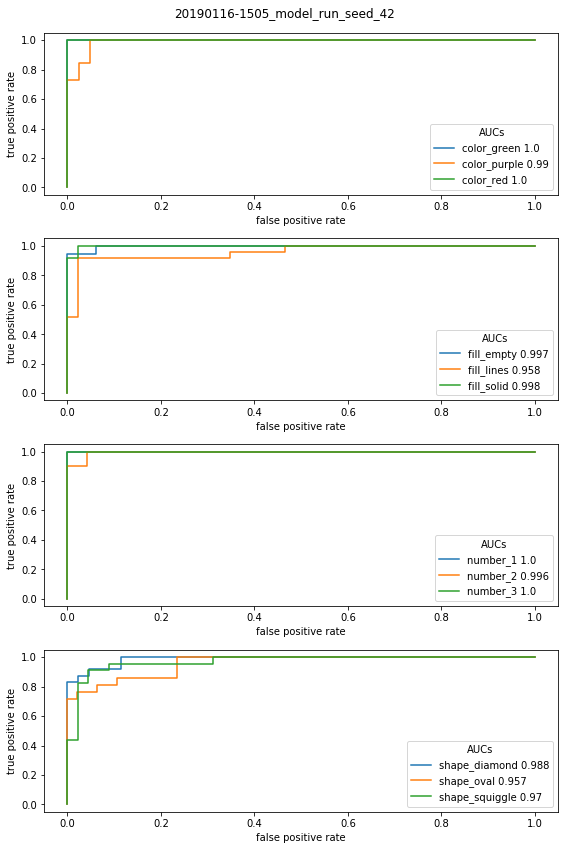

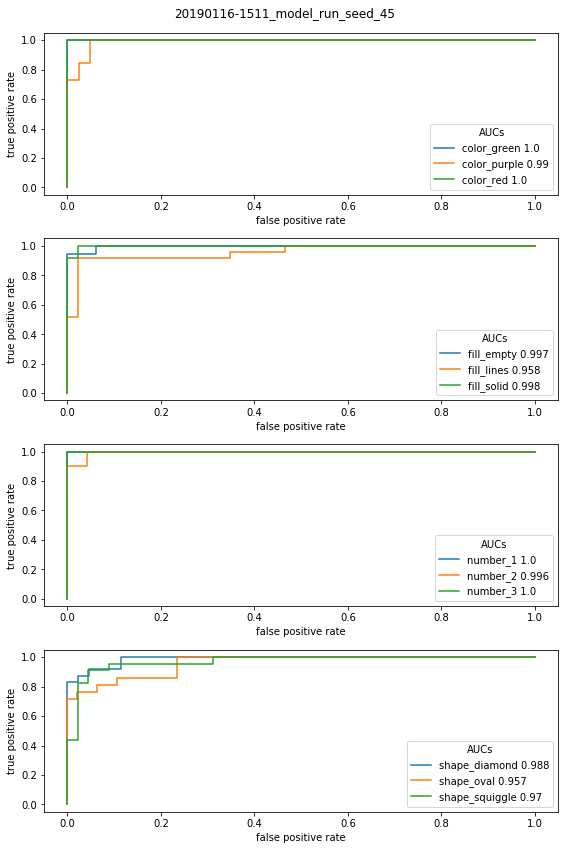

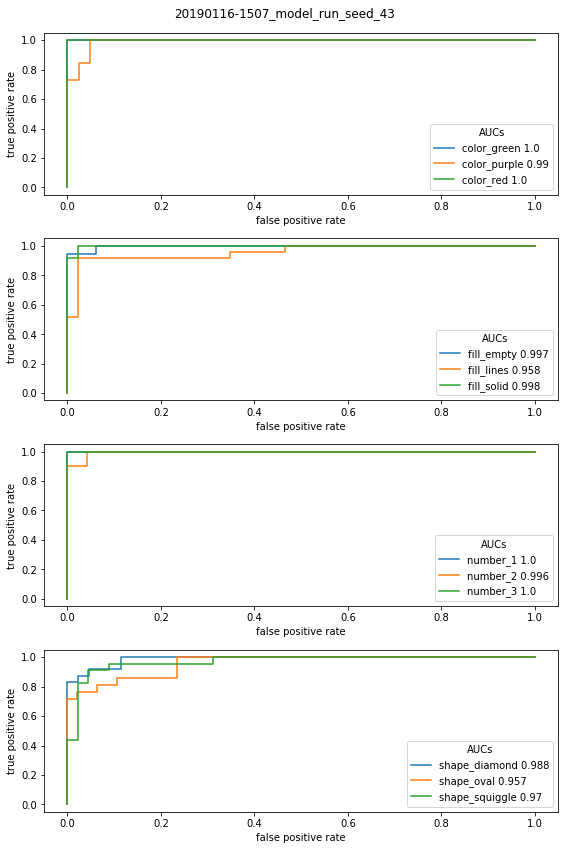

In [131]:
fpr_dicts = {}
tpr_dicts = {}
roc_auc_dicts = {}
for model_filename in model_filenames:
    model = load_checkpointed_keras_model(model_filename)
    base_run_name = model_filename.split('.')[0] 
    data_filename = base_run_name + '.data'
    print(base_run_name)
    with open(os.path.join(MODELS_DIR, data_filename), 'rb') as fin:
        train_x, test_x, train_y, test_y = pickle.load(fin)
        predictions = model.predict(test_x)
        fpr_dicts[base_run_name], tpr_dicts[base_run_name], roc_auc_dicts[base_run_name] = get_fpr_tpr_roc_auc(test_y, predictions)
        plot_auc_roc(fpr_dict, tpr_dict, roc_auc_dict, base_run_name)

In [ ]:
# todo: put the dicts in a pandas df, plot curves with error bars instead of one plot set per model

In [150]:
for base_run_name, auc_dict in roc_auc_dicts.items():
    print('{} AUC: {}'.format(base_run_name, round(np.mean(list(auc_dict.values())), 3), 4))
    
    for ind, value in auc_dict.items():
        print(LABEL_DICT[ind], round(value, 3))
    print('\n')

20190116-1505_model_run_seed_42 AUC: 0.91
color_green 0.986
color_purple 0.968
color_red 1.0
fill_empty 0.96
fill_lines 0.985
fill_solid 1.0
number_1 1.0
number_2 0.997
number_3 0.998
shape_diamond 0.745
shape_oval 0.817
shape_squiggle 0.469


20190116-1511_model_run_seed_45 AUC: 0.875
color_green 1.0
color_purple 0.997
color_red 1.0
fill_empty 0.819
fill_lines 0.762
fill_solid 0.987
number_1 1.0
number_2 0.988
number_3 1.0
shape_diamond 0.693
shape_oval 0.721
shape_squiggle 0.533


20190116-1507_model_run_seed_43 AUC: 0.988
color_green 1.0
color_purple 0.99
color_red 1.0
fill_empty 0.997
fill_lines 0.958
fill_solid 0.998
number_1 1.0
number_2 0.996
number_3 1.0
shape_diamond 0.988
shape_oval 0.957
shape_squiggle 0.97


